<a href="https://colab.research.google.com/github/Helenkomolafe/Excel-Analystic/blob/main/diabetes_prediction_with_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Diabetes Using Decision Tree Models: A Data-Driven Approach to Early Detection and Prevention



Introduction

Diabetes is an increasingly prevalent global health concern, affecting approximately one in every ten adults. According to the International Diabetes Federation (IDF), around 537 million adults worldwide had diabetes in 2021, and this figure is projected to rise to 783 million by 2045​
DIABETES ATLAS
​
INTERNATIONAL DIABETES FEDERATION
. In Nigeria, diabetes impacts over 5 million adults, or roughly 1 in 10, posing a significant public health challenge. Alarmingly, nearly half of all diabetes cases in Nigeria go undiagnosed, often until severe and potentially life-threatening complications arise. Early detection is crucial to managing diabetes effectively, as lifestyle changes like increased exercise and dietary modifications can reduce the risk of type 2 diabetes by up to 58% in high-risk individuals​.

Purpose of Project

This project aims to leverage machine learning (ML) techniques to aid in the early detection and prevention of diabetes. ML models can analyze health data to identify individuals in the pre-diabetes stage and those at high risk who have not yet developed diabetes. By identifying these individuals early, healthcare providers can guide them towards lifestyle changes, such as diet and physical activity modifications, to prevent the progression of the disease. Early intervention through ML-driven predictions enables healthcare providers to take timely action, helping reduce diabetes-related complications, save lives, and alleviate long-term healthcare costs by promoting preventive measures.


Challenges
Data Quality and Availability
Access to high-quality, diverse, and complete health data is crucial but often difficult to obtain. In Nigeria, health data may lack uniform standards, leading to missing or inconsistent records. This limits the development of accurate models, as large, clean datasets are essential for training and validating machine learning algorithms​
DIABETES ATLAS
.

Data Privacy and Security
Handling sensitive health data requires compliance with strict privacy regulations, such as Nigeria’s Data Protection Regulation (NDPR). Ensuring data security while balancing accessibility for model training can be challenging. Privacy concerns may also make patients or healthcare providers hesitant to share information, limiting data availability​
INTERNATIONAL DIABETES FEDERATION
.

Class Imbalance
In datasets for diabetes detection, pre-diabetes or high-risk cases may be far fewer than low-risk cases, leading to class imbalance. This imbalance can cause the model to favor low-risk predictions, which reduces its effectiveness in identifying high-risk individuals who need intervention.

Feature Selection and Model Interpretability
Selecting the most predictive features (e.g., BMI, blood glucose levels, lifestyle factors) and creating interpretable models are essential. Complex models like deep neural networks are often less transparent, making healthcare providers wary of trusting predictions without clear reasoning. Simpler, interpretable models may need to be prioritized in a healthcare setting.

Cultural and Lifestyle Variability
Data from other regions may not generalize well to Nigeria due to differences in genetic, lifestyle, and environmental factors. This challenge requires locally relevant data to ensure that identified risk factors and predictive patterns are accurate for the Nigerian population.

Continuous Updating and Validation
Diabetes risk factors and demographics can evolve, necessitating frequent updates to the model with recent data. This requires resources and ongoing collaboration with healthcare providers for validation to maintain accuracy and relevance.

Resource Constraints in Healthcare Settings
Limited technology infrastructure, especially in rural areas, may hinder implementing ML models in Nigeria. Staff may need additional training to interpret model outputs accurately, and resource constraints may limit access to recommended lifestyle interventions.

Opportunities
Early Intervention and Prevention
By detecting pre-diabetes and high-risk individuals before full-blown diabetes develops, ML models can enable timely interventions. Encouraging lifestyle modifications (e.g., diet and exercise) in these individuals can reduce their risk of developing diabetes by up to 58%, ultimately improving health outcomes and reducing future healthcare costs​.

Localized Predictive Insights
Developing models with locally sourced data can uncover specific risk factors and trends within Nigerian communities, leading to more tailored healthcare recommendations. By understanding region-specific predictors, healthcare providers can target prevention efforts more accurately.

Enhanced Healthcare Efficiency
ML can improve healthcare efficiency by automating the screening process, allowing healthcare professionals to focus on high-risk individuals. This can help alleviate the burden on Nigeria’s healthcare system, particularly in under-resourced areas, and allow providers to prioritize patients with the highest risk.

Education and Awareness
Predictive models can serve as tools for raising awareness among at-risk populations. As individuals understand their personal risk, they are more likely to adopt preventive health behaviors, thereby reducing the national prevalence of diabetes.

Data-Driven Policy Making
Insights from these models can inform public health policies and resource allocation in Nigeria. For example, data trends could reveal areas with a higher prevalence of pre-diabetes, guiding decisions about where to allocate healthcare resources or focus educational campaigns.

Potential for Telemedicine Integration
ML-driven diabetes detection can be integrated with telemedicine platforms, providing remote consultations and continuous monitoring to rural or underserved areas. This integration allows at-risk individuals to receive ongoing support and personalized care without needing regular physical visits, making diabetes management more accessible across Nigeria.

Scalability to Other Health Conditions
Success in diabetes risk prediction can pave the way for ML applications in detecting other chronic conditions like hypertension and cardiovascular diseases. This approach would build a foundation for broader chronic disease prevention, benefiting overall public health.

### Objectives
1. Conduct exploratory data analysis (EDA) to understand the dataset.
2. Preprocess and clean the data.
3. Train a decision tree classifier and evaluate its performance.
4. Discuss insights and potential future improvements.

## 2. Importing Libraries and Configuring Settings

We start by importing essential Python libraries:
- **NumPy**: For numerical operations.
- **Pandas**: For data manipulation and analysis.
- **Matplotlib & Seaborn**: For data visualization.
- **Scikit-learn**: For model building and evaluation.

We will also configure settings for visualizations to enhance plot readability and set a random seed to ensure reproducibility of results.


In [ ]:
#  import necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# customize matplotlib and seaborn plots
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']= '#00000000'

# Set random seed for reproducibility
np.random.seed(42)

## 3. Import dataset

In [ ]:
# Import dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True, readonly=True)
file_path = '/content/drive/My Drive/diabetes_prediction_dataset.csv'
diabetes_data = pd.read_csv(file_path)
diabetes_data.head()

Mounted at /content/drive


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Here's some explanation of each feature in the dataset:

- `gender`: Indicates the biological sex of the individual.
- `age`: Represents the age of the individual in years.
- `hypertension`: Indicates whether the individual has been diagnosed with hypertension (high blood pressure)
- `heart_disease`: Indicates whether the individual has a history of heart disease.
- `smoking_history`: Describes the individual's smoking habits or history.
- `bmi` (Body Mass Index): A measure of body fat based on height and weight (kg/m²).
- `HbA1c_Level`: The average blood sugar level over the past 2-3 months, measured as a percentage. It indicates the amount of glucose that has been attached to hemoglobin in the blood.
- `blood_glucose_level`: Represents the level of random blood glucose (sugar) in the blood at a specific point in time, measured in milligrams per deciliter (mg/dL).
- `diabetes`: The target variable indicating whether the individual has diabetes.

## 4. Exploratory Data Analysis (EDA) and Feature Engineering

Exploratory Data Analysis helps us understand the dataset better:
1. **Shape and Columns**: We first check the number of records and features.
2. **Data Types and Null Values**: Using `info()` to ensure there are no missing values and that data types are appropriate.
3. **Statistical Summary**: `describe()` provides an overview of the numerical features, such as mean, min, and max values.
4. **Feature Distribution**: Visualizing the distribution of each feature helps identify patterns or potential outliers.
5. **Correlation Analysis**: This helps give insights into relationships between variables.


In [ ]:
# Basic information about the dataset
print("Shape of the dataset:", diabetes_data.shape)
print("\n")
print("\nColumns in the dataset:", list(diabetes_data.columns))
print("\n")
diabetes_data.info()

Shape of the dataset: (100000, 9)



Columns in the dataset: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


The data contains 100,000 rows and 9 columns and none of the 9 columns contain null values.

In [ ]:
# Statistical summary of the dataset
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


The mean age of 42 seems reasonable, since those who report to hospital with diabetes related complications are usually middle-aged persons. However, the minimum age of 0.08 looks strange, and we will investiagte that later on


The `hypertension`, `heart_disease` and the `diabetes` columns may contain binary data(0s and 1s). we will explore each of them later on

Later on, we will also explore the `age`,`bmi`, `HbA1c_level` and `blood_glucose_level` columns to see if the columns contain outliers

In [ ]:
# Check for duplicates in the dataset
diabetes_data.duplicated().sum()

3854

There are **3,854 duplicate rows** of data. We will drop the duplicated rows

In [ ]:
# Drop duplicate data
diabetes_data=diabetes_data.drop_duplicates()

In [ ]:
diabetes_data.duplicated().sum()

0

All duplicates have been droped

In [ ]:
# Calculate the counts and proportions of values in diabetes colum(target column)

# Check for distribution of values in diabetes colum(target column)
diabetes_data.diabetes.value_counts()

diabetes_counts = diabetes_data.diabetes.value_counts()
diabetes_proportions = (diabetes_data.diabetes.value_counts(normalize=True) * 100).round(2)

# Combine them into one DataFrame
diabetes_df = pd.DataFrame({
    'Count': diabetes_counts,
    'Proportion (%)': diabetes_proportions
})
diabetes_df

,Count,Proportion (%)
diabetes,,
0,87664,91.18
1,8482,8.82


The diabetes column contains two values, `0` and `1`. `0` for those who dont have diabetes and `1` for those who have diabetes

The dataset is also quite imbalanced.  About 91% of the patients do not have diabetes, while 9% have been diagnosed with diabetes. We will consider this factor when measuring the model performance.

Now, let's view the distribution of the data with a barplot

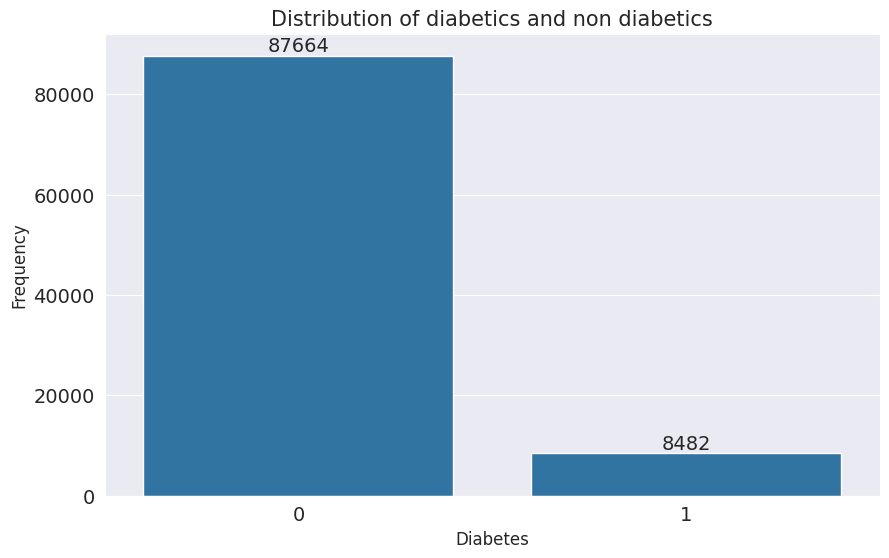

In [ ]:
ax = sns.countplot(data=diabetes_data, x='diabetes')
plt.title('Distribution of diabetics and non diabetics', fontsize=15)
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

#### Gender column

In [ ]:
# Check for uniqueness and distribution of values in gender column
diabetes_data.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

There are 3 unique genders in the dataset which are either 'Female', 'Male', or 'Other'.


In [ ]:

# Calculate the counts and proportions of gender
gender_counts = diabetes_data.gender.value_counts()
gender_proportions = (diabetes_data.gender.value_counts(normalize=True) * 100).round(2)

# Combine them into one DataFrame
gender_df = pd.DataFrame({
    'Count': gender_counts,
    'Proportion (%)': gender_proportions
})
gender_df

,Count,Proportion (%)
gender,,
Female,56161,58.41
Male,39967,41.57
Other,18,0.02


About 58% are 'Female', 42% are 'Male' and nearly 0% (18 out of 96,146) identify as 'Other'

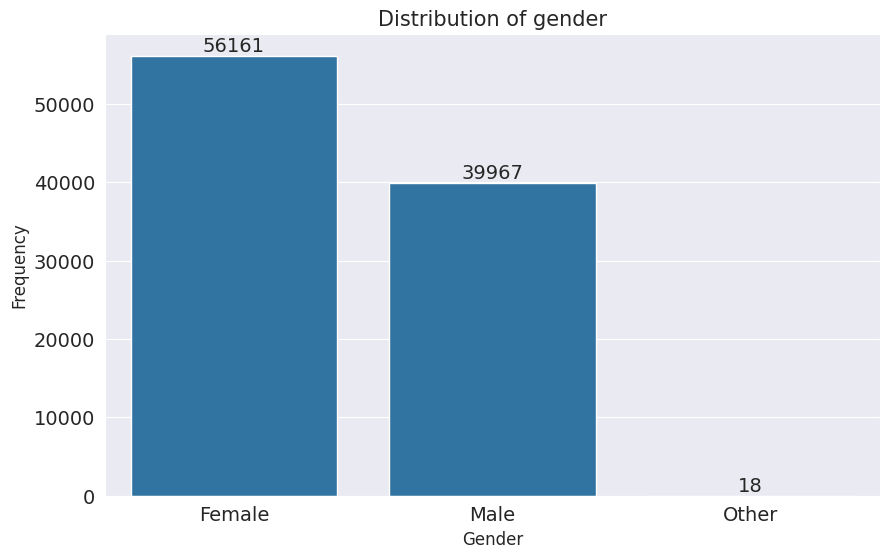

In [ ]:
# distribution of gender within the studied population
ax = sns.countplot(data=diabetes_data, x='gender')
plt.title('Distribution of gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

The distribution of gender within the studied population reveals a higher frequency of females compared to males, indicating that the female gender is the most represented group in this dataset.

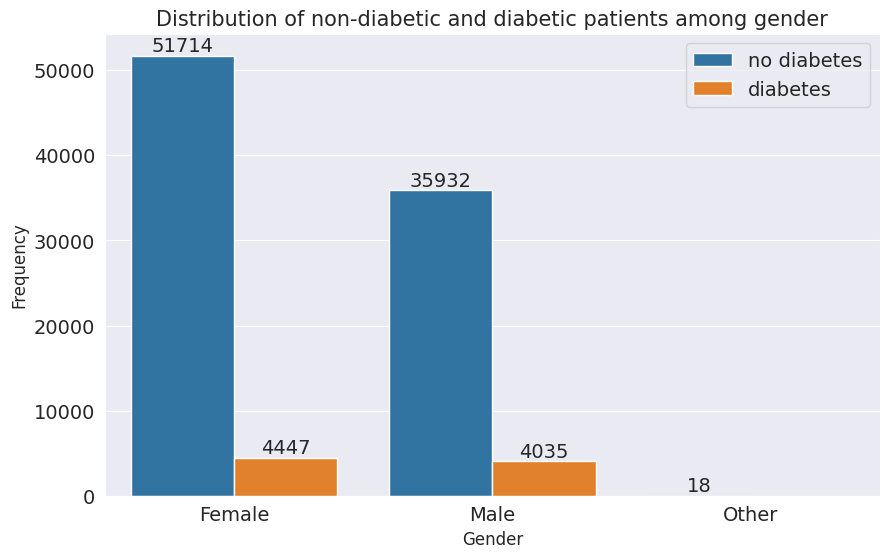

In [ ]:
# distribution on of non-diabetic and diabeteic patients among the various genders
ax = sns.countplot(data=diabetes_data, x='gender', hue="diabetes")
plt.title('Distribution of non-diabetic and diabetic patients among gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(['no diabetes', 'diabetes'])
for i in ax.containers:
    ax.bar_label(i,);

About 8% (4,447 of 56,161) of females, and 10% (4,035 of 39,967) of males were observed to be diabetic. This may indicate that men are fairly likely to be diabetic. This might also not be true as the sample included more women, hence the lesser ratio. We would look more into this later.

In [ ]:
# Analysis of the age column
diabetes_data.age.describe()

,age
count,96146.000000
mean,41.794326
std,22.462948
min,0.080000
25%,24.000000
50%,43.000000
75%,59.000000
max,80.000000


The minimum age is 0.08. let's view the unique ages in ascending order to investigaet why age is in decimal

In [ ]:
np.sort(diabetes_data.age.unique())

array([ 0.08,  0.16,  0.24,  0.32,  0.4 ,  0.48,  0.56,  0.64,  0.72,
        0.8 ,  0.88,  1.  ,  1.08,  1.16,  1.24,  1.32,  1.4 ,  1.48,
        1.56,  1.64,  1.72,  1.8 ,  1.88,  2.  ,  3.  ,  4.  ,  5.  ,
        6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  , 14.  ,
       15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 21.  , 22.  , 23.  ,
       24.  , 25.  , 26.  , 27.  , 28.  , 29.  , 30.  , 31.  , 32.  ,
       33.  , 34.  , 35.  , 36.  , 37.  , 38.  , 39.  , 40.  , 41.  ,
       42.  , 43.  , 44.  , 45.  , 46.  , 47.  , 48.  , 49.  , 50.  ,
       51.  , 52.  , 53.  , 54.  , 55.  , 56.  , 57.  , 58.  , 59.  ,
       60.  , 61.  , 62.  , 63.  , 64.  , 65.  , 66.  , 67.  , 68.  ,
       69.  , 70.  , 71.  , 72.  , 73.  , 74.  , 75.  , 76.  , 77.  ,
       78.  , 79.  , 80.  ])

The ages in decimals may refer to months, where 1 month old equals 0.08yrs(1/12), 2 months old:0.16(2/12), 3 months:0.24(3/12).

In [ ]:
# let's view the frequencies of the ages
diabetes_data.age.value_counts()

,count
age,
80.00,4932
51.00,1566
47.00,1511
48.00,1508
53.00,1498
...,...
1.00,83
0.48,83
0.40,66


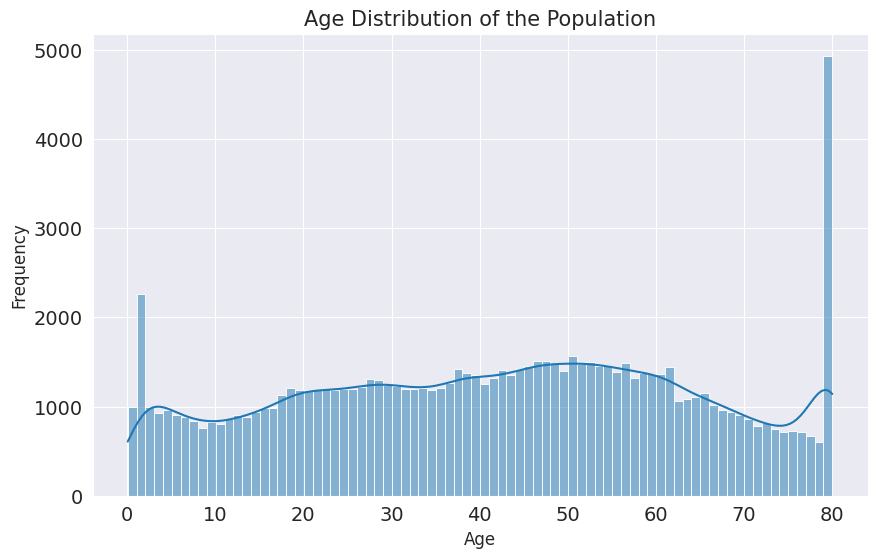

In [ ]:
sns.histplot(data=diabetes_data, x='age', bins=80, kde=True)
plt.title('Age Distribution of the Population', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Overall, the chart shows two main peaks, suggesting two prominent age groups in the population. There's a high frequency of individuals at both the youngest and oldest ages, which might indicate specific age cutoffs or data collection limits. In between these peaks, the age distribution is more even, with some variation but no major spikes.

<function matplotlib.pyplot.show(close=None, block=None)>

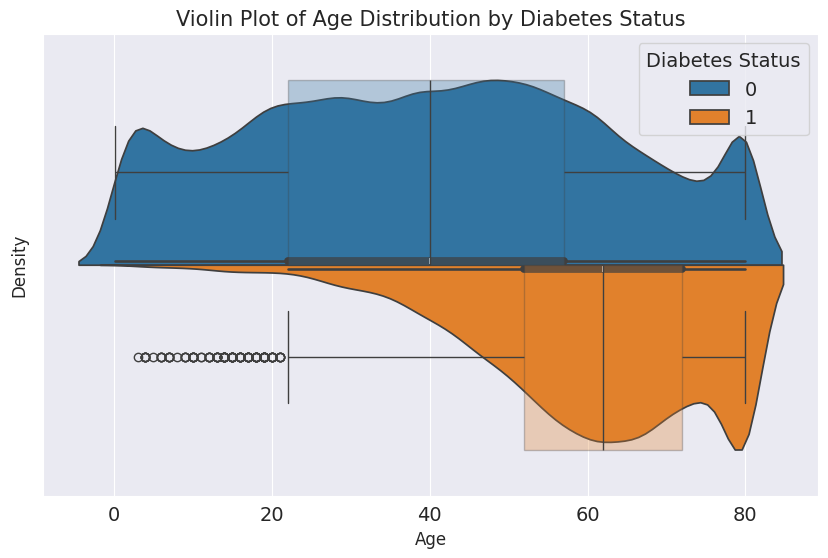

In [ ]:
# Create the violin plot to how the distribution of age with respect to diabetes status
sns.violinplot(data=diabetes_data, x='age', hue='diabetes', split=True)

# Overlay the box plot with outliers, without showing an additional legend
sns.boxplot(data=diabetes_data, x='age', hue='diabetes', showfliers=True,
            boxprops=dict(alpha=0.3), dodge=True)  # Use dodge=True to align hues correctly

# Add title and labels
plt.title('Violin Plot of Age Distribution by Diabetes Status', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Retrieve the handles and labels from one of the plots for a single legend
handles, labels = plt.gca().get_legend_handles_labels()
# Place the legend at the top right
plt.legend(handles[:2], labels[:2], title='Diabetes Status', loc='upper right')

plt.show


The ages of the patients with diabetes are skewed to the left; there a couple of outliers at the left whisker of the lower box plot. Also from the lower histogram, 'older' people are more likely to be diagnosed with diabetes than 'younger' people.

In [ ]:
# what is the age of the youngest person to have been diagnosed with diabetes?
diabetes_data[diabetes_data.diabetes==1].sort_values(by='age', ascending=True).head(1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
29893,Male,3.0,0,0,No Info,27.32,5.7,200,1


The age of the youngest person to have been diagnosed with diabetes was just 3 years old.

#### Hypertension

In [ ]:
# Calculate the counts and proportions of hypertension
hypertension_counts = diabetes_data.hypertension.value_counts()
hypertension_proportions = (diabetes_data.hypertension.value_counts(normalize=True) * 100).round(2)

# Combine them into one DataFrame
hypertension_df = pd.DataFrame({
    'Count': hypertension_counts,
    'Proportion (%)': hypertension_proportions
})
hypertension_df

,Count,Proportion (%)
hypertension,,
0,88685,92.24
1,7461,7.76


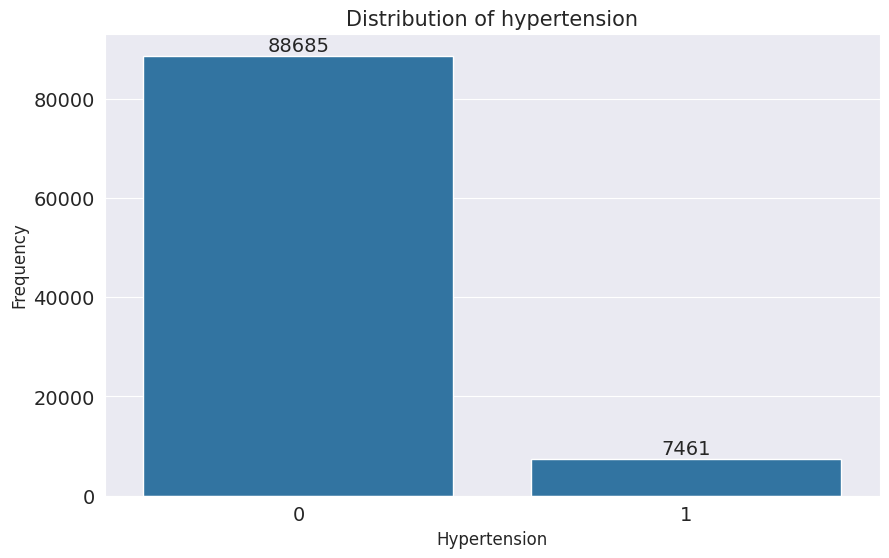

In [ ]:
# distribution of hypertension on barchart
ax = sns.countplot(data=diabetes_data, x='hypertension')
plt.title('Distribution of hypertension', fontsize=15)
plt.xlabel('Hypertension', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);


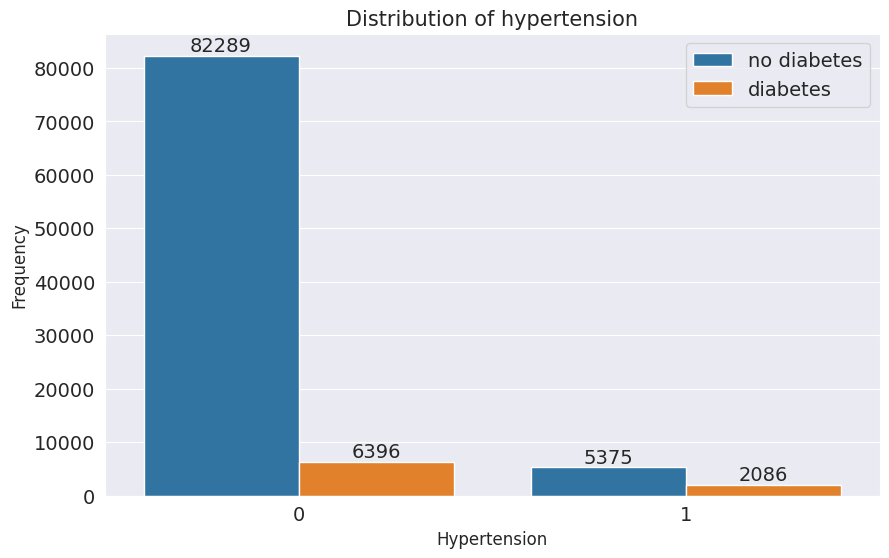

In [ ]:
# distribution of diabetic and no diabetic patients among 'hypertension'
ax = sns.countplot(data=diabetes_data, x='hypertension', hue='diabetes')
plt.title('Distribution of hypertension', fontsize=15)
plt.xlabel('Hypertension', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(['no diabetes', 'diabetes'])
for i in ax.containers:
    ax.bar_label(i,);

About 28% (2,086 of 7,461) of persons with hypertension were reported to be diabetic compared to less than 7% (6,396 of 88,685) of non-hypertensive patients that were reported to be diabetic too, signifying that a person who is hypertensive is more likely to have diabetes than those who are not hypertensive

#### heart_disease

In [ ]:
# Calculate the counts and proportions of heart disease
heart_disease_counts = diabetes_data.heart_disease.value_counts()
heart_disease_proportions = (diabetes_data.heart_disease.value_counts(normalize=True) * 100).round(2)

# Combine them into one DataFrame
heart_disease_df = pd.DataFrame({
    'Count': heart_disease_counts,
    'Proportion (%)': heart_disease_proportions
})
heart_disease_df

,Count,Proportion (%)
heart_disease,,
0,92223,95.92
1,3923,4.08


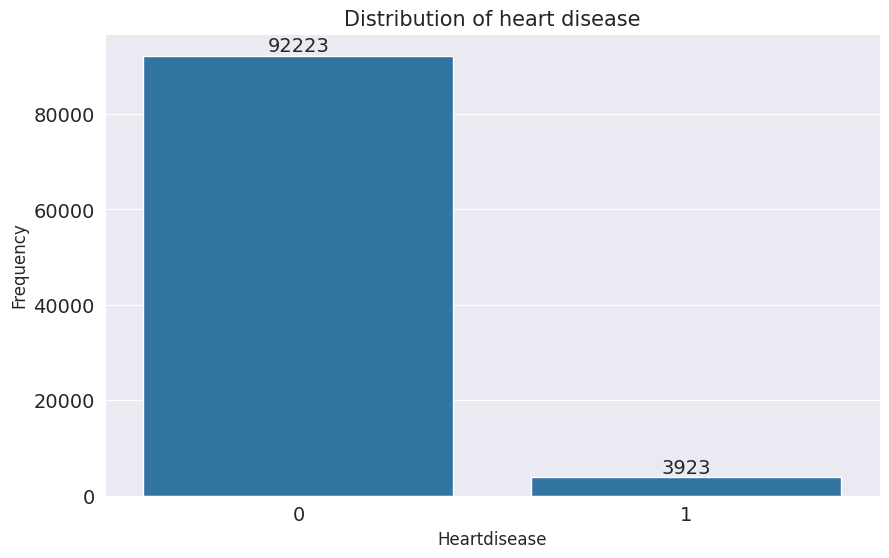

In [ ]:
# distribution of heart_disease on a graph
ax = sns.countplot(data=diabetes_data, x='heart_disease')
plt.title('Distribution of heart disease', fontsize=15)
plt.xlabel('Heartdisease', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

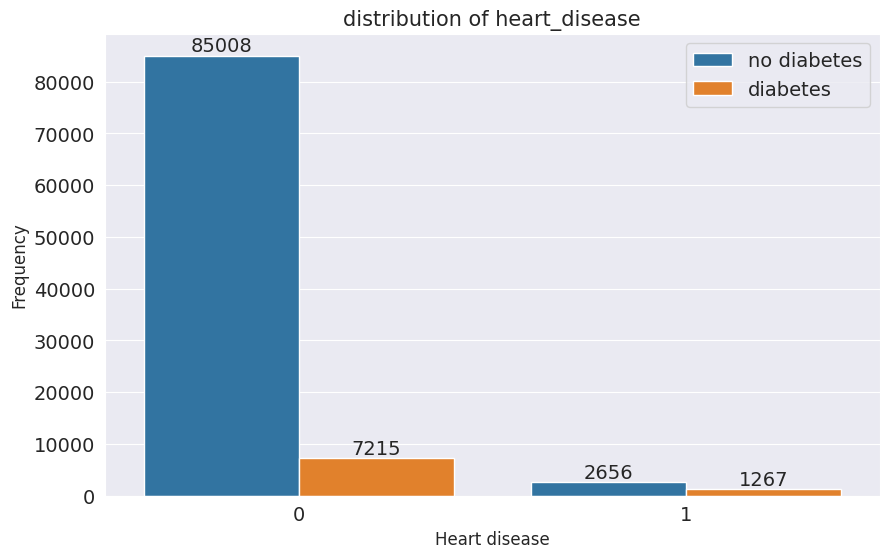

In [ ]:
# distribution of diabetic and no diabetic patients among 'heart_disease'
ax = sns.countplot(data=diabetes_data, x='heart_disease', hue='diabetes')
plt.title('distribution of heart_disease', fontsize=15)
plt.xlabel('Heart disease', fontsize=12)
plt.ylabel('Frequency', fontsize=12);
plt.legend(['no diabetes', 'diabetes'])
for i in ax.containers:
    ax.bar_label(i,);

About 32% (1,267 of 3,923) of persons with hypertension were reported to be diabetic compared to just 8% (7,215 of 92,223) of non-hypertensive patients that were reported to be diabetic too, signifying that a person who is hypertensive is more likely to have diabetes than those who are not hypertensive

This also means that persons who have heart  disease is more likely to have diabetes than those who do not have heart disease

#### smoking_history

In [ ]:
# number of unique entries in the 'smoking_history' column
diabetes_data.smoking_history.nunique()

6

In [ ]:
# unique entries in the 'smoking_history' column
print(diabetes_data.smoking_history.unique())


# number of unique entries in the 'smoking_history' column
print(f"\n\nNumber of unique entries in the 'smoking_history' column:  {diabetes_data.smoking_history.nunique()}")

['never' 'No Info' 'current' 'former' 'ever' 'not current']


Number of unique entries in the 'smoking_history' column:  6


In [ ]:
# Calculate the counts and proportions of smoking history
smoking_history_counts = diabetes_data.smoking_history.value_counts()
smoking_history_proportions = (diabetes_data.smoking_history.value_counts(normalize=True) * 100).round(2)

# Combine them into one DataFrame
smoking_history_df = pd.DataFrame({
    'Count': smoking_history_counts,
    'Proportion (%)': smoking_history_proportions
})
smoking_history_df

,Count,Proportion (%)
smoking_history,,
never,34398,35.78
No Info,32887,34.21
former,9299,9.67
current,9197,9.57
not current,6367,6.62
ever,3998,4.16


The smoking history data is somewhat noisy, so we are going to do some feature engineering to reduce the number of attributes to only `never`, `no info`, and `smoked`.

In [ ]:
# Create a mapping to bin the smoking history categories
diabetes_data['smoking_history'] = diabetes_data.smoking_history.replace({
    'never': 'never',
    'No Info': 'no Info',
    'current': 'smoked',
    'former': 'smoked',
    'ever': 'smoked',
    'not current': 'smoked'
})

# Calculate the counts and proportions of the binned smoking history
smoking_history_counts = diabetes_data.smoking_history.value_counts()
smoking_history_proportions = (diabetes_data.smoking_history.value_counts(normalize=True) * 100).round(2)

# Combine them into one DataFrame
smoking_history_df = pd.DataFrame({
    'Count': smoking_history_counts,
    'Proportion (%)': smoking_history_proportions
})

# Display the new DataFrame
smoking_history_df


,Count,Proportion (%)
smoking_history,,
never,34398,35.78
no Info,32887,34.21
smoked,28861,30.02


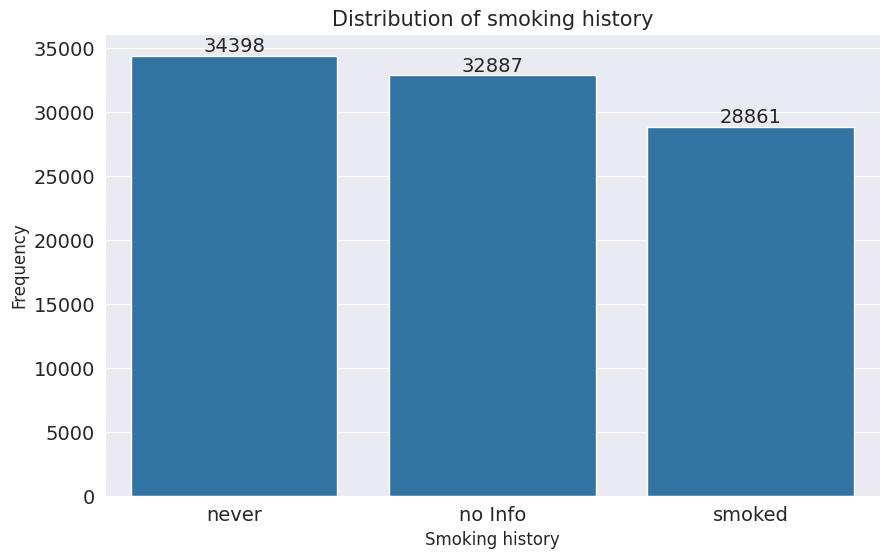

In [ ]:
# distribution of smoking_history column on graph
ax = sns.countplot(data=diabetes_data,
                   x='smoking_history',
                  order=diabetes_data['smoking_history'].value_counts(ascending=False).index)
plt.title('Distribution of smoking history', fontsize=15)
plt.xlabel('Smoking history', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
for i in ax.containers:
    ax.bar_label(i,);

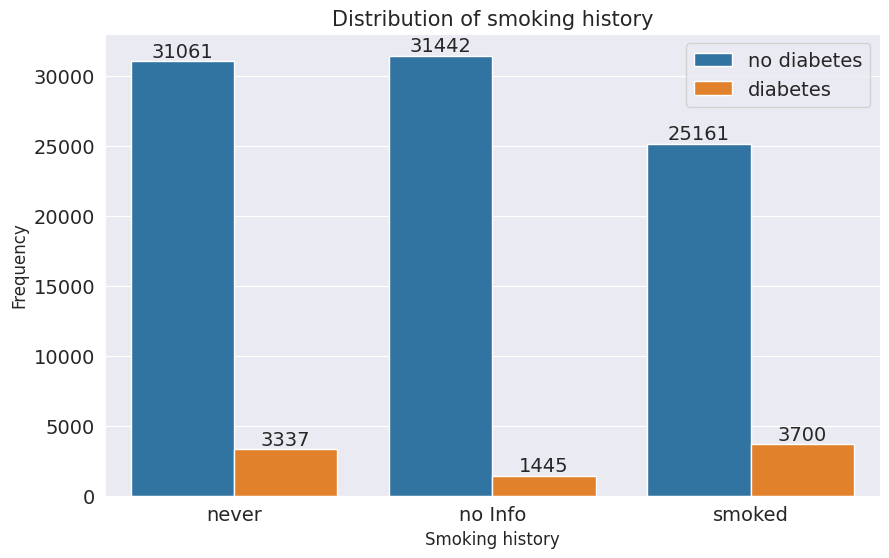

In [ ]:
# distribution of diabetic and no diabetic patients among 'smoking_history'
ax = sns.countplot(data=diabetes_data,
                   x='smoking_history',
                  hue='diabetes',
                  order=diabetes_data['smoking_history'].value_counts(ascending=False).index)
plt.title('Distribution of smoking history', fontsize=15)
plt.xlabel('Smoking history', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(['no diabetes', 'diabetes'])
for i in ax.containers:
    ax.bar_label(i,);

Patients with smoking history are more likely to be diabetic than those who are not.

#### BMI

BMI stands for body mass index. A person's bmi is found by dividing body weigth in kilograms by height in meters squared

* bmi below 18.5 is deemed under weight
* 18.5-24.9 is healthy weight
* 25-29.9 is overweight
* 30 and above is obesity

In [ ]:
diabetes_data.bmi.describe()

,bmi
count,96146.000000
mean,27.321461
std,6.767716
min,10.010000
25%,23.400000
50%,27.320000
75%,29.860000
max,95.690000


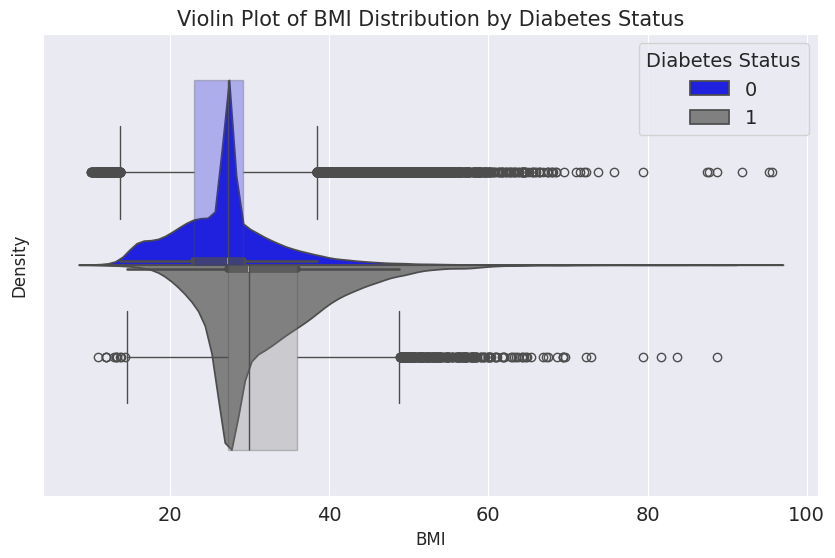

In [ ]:
# Create the violin plot to show the distribution of BMI with respect to diabetes status
sns.violinplot(data=diabetes_data, x='bmi', hue='diabetes', split=True, palette=['blue', 'grey'])

# Overlay the box plot with outliers, without showing an additional legend
sns.boxplot(data=diabetes_data, x='bmi', hue='diabetes', showfliers=True,
            boxprops=dict(alpha=0.3), dodge=True, palette=['blue', 'grey'])  # Use dodge=True to align hues correctly

# Add title and labels
plt.title('Violin Plot of BMI Distribution by Diabetes Status', fontsize=15)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Retrieve the handles and labels from one of the plots for a single legend
handles, labels = plt.gca().get_legend_handles_labels()
# Place the legend at the top right
plt.legend(handles[:2], labels[:2], title='Diabetes Status', loc='upper right')

plt.show()

The bmi of patients with diabetes is skewed to the right, with a higher median than those without diabetes.

Persons with higher bmi are more likely to have diabetes than those with lower bmi

There seems to be a lot of outliers in the bmi across the entire dataset

#### HbA1c level

HbA1c stands for Glycohemoglobin A1c. A person's HbA1c level is the average blood glucose level of that person over the past three months

* HbA1c level less than 5.7% is considered as normal
* between 5.7-6.4% is considered to be prediabetic
* while HbA1c level higher than 6.4% is considered to be diabetic

In [ ]:
diabetes_data.HbA1c_level.describe()

,HbA1c_level
count,96146.000000
mean,5.532609
std,1.073232
min,3.500000
25%,4.800000
50%,5.800000
75%,6.200000
max,9.000000


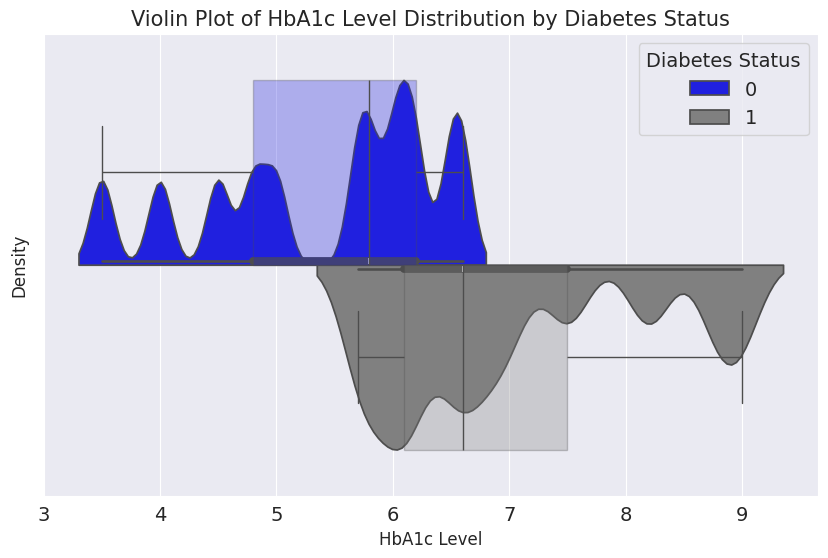

In [ ]:
# Create the violin plot to show the distribution of HbA1c levels with respect to diabetes status
sns.violinplot(data=diabetes_data, x='HbA1c_level', hue='diabetes', split=True, palette=['blue', 'grey'])

# Overlay the box plot with outliers, with some transparency to see both plots
sns.boxplot(data=diabetes_data, x='HbA1c_level', hue='diabetes', showfliers=True,
            boxprops=dict(alpha=0.3), dodge=True, palette=['blue', 'grey'])  # Use dodge=True to align hues correctly

# Add title and labels
plt.title('Violin Plot of HbA1c Level Distribution by Diabetes Status', fontsize=15)
plt.xlabel('HbA1c Level', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Retrieve the handles and labels from one of the plots for a single legend
handles, labels = plt.gca().get_legend_handles_labels()
# Place the legend at the top right
plt.legend(handles[:2], labels[:2], title='Diabetes Status', loc='upper right')

plt.show()

From the violin plot and the boxplots, the HbA1c_level isnt much different from the age and bmi in a sense that, patients with higher HbA1c levels are more likely to have diabetes than patients with lower HbA1c levels.

The violin plot of patients who have diabetes(lower violin plot) has a higher median, signifying a more likelyhood of having diabetes

However, the HbA1c_level does not seem to contain outliers

#### Blood Glucose Level

Blood glucose level refers to the amount of glucose in the blood at the time of the test

the normal blood glucose level depends on many factors, such as
* whether one is fasting or not
* time of the day
* number of hours since last ate

In [ ]:
diabetes_data.blood_glucose_level.describe()

,blood_glucose_level
count,96146.000000
mean,138.218231
std,40.909771
min,80.000000
25%,100.000000
50%,140.000000
75%,159.000000
max,300.000000


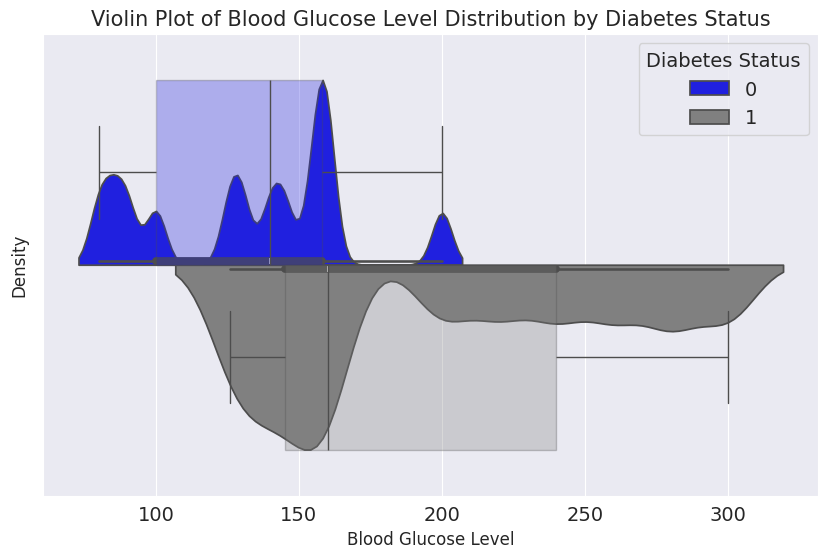

In [ ]:
# Create the violin plot to show the distribution of blood glucose levels with respect to diabetes status
sns.violinplot(data=diabetes_data, x='blood_glucose_level', hue='diabetes', split=True, palette=['blue', 'grey'])

# Overlay the box plot with outliers, with some transparency to see both plots
sns.boxplot(data=diabetes_data, x='blood_glucose_level', hue='diabetes', showfliers=True,
            boxprops=dict(alpha=0.3), dodge=True, palette=['blue', 'grey'])  # Use dodge=True to align hues correctly

# Add title and labels
plt.title('Violin Plot of Blood Glucose Level Distribution by Diabetes Status', fontsize=15)
plt.xlabel('Blood Glucose Level', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Retrieve the handles and labels from one of the plots for a single legend
handles, labels = plt.gca().get_legend_handles_labels()
# Place the legend at the top right
plt.legend(handles[:2], labels[:2], title='Diabetes Status', loc='upper right')

plt.show()

Blood glucose level also have a positive relationship with likelyhood of having diabetes.
From the violin and the boxplots, patients with higher blood glucose levels are more likely to have diabetes than patients with lower blood glucose levels.

The plots of patients who have diabetes(plots) has a higher median, signifying a more likelyhood of having diabetes

However, the blood glucose level does not seem to contain outliers

#### observations from the exploratory analysis

**Age**
* 'Older' people are more likely to be diagnosed with diabetes than 'younger' people.

**Smoking-history**
* The number of missing values(No Info) in the smoking_history column is quite significant: (over 34%)
* patients with smoking history are more likely to be diabetic than the other categories in the smoking history column

**BMI**
* Patients with higher bmi are more likely to have diabetes than those with lower bmi

**HbA1c_level**
* Patients with higher HbA1c levels are more likely to have diabetes than patients with lower HbA1c levels.


**Blood Glucose level**
* Blood glucose level has a positive relationship with likelyhood of having diabetes. Patients with higher blood glucose levels are more likely to have diabetes than patients with lower blood glucose level.

**Presence of outliers**
* we have also seen that, the age, bmi and HbA1c_level may contain outliers

Later on, we will be training a decision tree model, which is more robust to outliers

## 5. Model Building and Training

We use a **Decision Tree Classifier** from Scikit-learn:
- **Initialization**: We specify the maximum depth to prevent overfitting.
- **Model Training**: The model is trained using the training data.
- **Model Visualization**: Plotting the tree structure helps us understand the decision-making process.

In [ ]:
# Importing the necessary module for data training and spliting
from sklearn.model_selection import train_test_split

In [ ]:
# set 20% as test data, save remaining for training and validation
train_and_val_df, test_df = train_test_split(diabetes_data, test_size=0.2, random_state=42)

# split train_and_val_df into training and validation sets
train_df, val_df = train_test_split(train_and_val_df, test_size=0.25, random_state=42)


In [ ]:
print(f'Training dataset shape: {train_df.shape}\n')
print(f'Validation dataset shape: {val_df.shape}\n')
print(f'Test dataset shape: {test_df.shape}\n')

Training dataset shape: (57687, 9)

Validation dataset shape: (19229, 9)

Test dataset shape: (19230, 9)



In [ ]:
# training dataframe
train_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
35488,Female,59.0,0,0,smoked,27.10,4.8,126,0
46270,Female,74.0,0,0,never,36.52,6.1,240,1
63475,Male,72.0,0,0,smoked,26.70,3.5,155,0
57322,Male,46.0,0,0,no Info,24.48,4.5,140,0
47583,Male,50.0,1,0,smoked,35.56,6.5,140,0


In [ ]:
# validation dataframe
val_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
960,Male,8.0,0,0,no Info,29.35,5.7,80,0
33783,Female,59.0,0,0,never,27.32,6.1,160,0
26364,Female,33.0,0,0,smoked,28.77,5.8,200,0
43714,Female,45.0,0,0,no Info,58.32,5.7,280,1
17368,Male,80.0,0,1,smoked,24.36,6.5,145,1


In [ ]:
# test dataframe
test_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2547,Female,5.0,0,0,no Info,15.14,4.5,90,0
34774,Male,19.0,0,0,never,22.74,6.6,85,0
71084,Female,52.0,0,0,never,24.27,7.5,220,1
50584,Male,55.0,0,0,no Info,27.32,5.7,85,0
80788,Female,22.0,0,0,never,28.78,4.5,200,0


##### input and target columns

In [ ]:
# input columns
input_cols = list(diabetes_data.columns)[0:-1]
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [ ]:
# target column
target_col=['diabetes']

In [ ]:
# let's create input  and target dataframes for the training, validations and test sets
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [ ]:
# Inspect numeric and categorical coumns
numeric_cols = train_inputs.select_dtypes(include=['int', 'float']).columns.tolist()
print(f"Numeric columns: {numeric_cols}\n")

categorical_cols = train_inputs.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical coumns: {categorical_cols}")


Numeric columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

Categorical coumns: ['gender', 'smoking_history']


### Imputation

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


None of our columns contain missing values, so we dont need to make any imputation

### scaling

In [ ]:
diabetes_data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,96146.0,41.794326,22.462948,0.08,24.0,43.00,59.00,80.00
hypertension,96146.0,0.077601,0.267544,0.00,0.0,0.00,0.00,1.00
heart_disease,96146.0,0.040803,0.197833,0.00,0.0,0.00,0.00,1.00
bmi,96146.0,27.321461,6.767716,10.01,23.4,27.32,29.86,95.69
HbA1c_level,96146.0,5.532609,1.073232,3.50,4.8,5.80,6.20,9.00
blood_glucose_level,96146.0,138.218231,40.909771,80.00,100.0,140.00,159.00,300.00
diabetes,96146.0,0.088220,0.283616,0.00,0.0,0.00,0.00,1.00


Consider the range of values of some of the columns below

**Age**: 0.08 to 80years

**HbA1c_level**: 3.5 to 9

**Blood_glucose_level**: 80 to 300

**Other binary columns**: 0 to 1

Because different columns have different range of values(scales), it is difficult to compare the weights of columns to identify which features are more important. A column with larger range of inputs may dominate the optimization process

Due to this, we will scale(standardize) the values in numeric columns using the MinMaxScaler class from Scikit-learn

In [ ]:
# Importing module for scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### encoding categorical columns

In [ ]:
diabetes_data.describe(include=['object']).T

,count,unique,top,freq
gender,96146,3,Female,56161
smoking_history,96146,3,never,34398


The `gender` and the `smoking_history` columns contain nominal data, we will need to encode them too using the `pd.get_dummies()` method from pandas

In [ ]:
# One-hot encode using get_dummies for training data
train_inputs = pd.get_dummies(train_inputs, columns=categorical_cols, drop_first=True, dtype=int)

# For validation and test data, ensure you use the same columns as in training
val_inputs = pd.get_dummies(val_inputs, columns=categorical_cols, drop_first=True, dtype=int)
test_inputs = pd.get_dummies(test_inputs, columns=categorical_cols, drop_first=True, dtype=int)

# Align the columns in val_inputs and test_inputs with train_inputs
val_inputs = val_inputs.reindex(columns=train_inputs.columns, fill_value=0)
test_inputs = test_inputs.reindex(columns=train_inputs.columns, fill_value=0)

In [ ]:
# let's take a look at out train_inputs dataframe
train_inputs.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_no Info,smoking_history_smoked
35488,0.737237,0.0,0.0,0.199463,0.236364,0.209091,0,0,0,1
46270,0.924925,0.0,0.0,0.309407,0.472727,0.727273,0,0,0,0
63475,0.899900,0.0,0.0,0.194795,0.000000,0.340909,1,0,0,1
57322,0.574575,0.0,0.0,0.168884,0.181818,0.272727,1,0,1,0
47583,0.624625,1.0,0.0,0.298203,0.545455,0.272727,1,0,0,1


In [ ]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57687 entries, 35488 to 47156
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      57687 non-null  float64
 1   hypertension             57687 non-null  float64
 2   heart_disease            57687 non-null  float64
 3   bmi                      57687 non-null  float64
 4   HbA1c_level              57687 non-null  float64
 5   blood_glucose_level      57687 non-null  float64
 6   gender_Male              57687 non-null  int64  
 7   gender_Other             57687 non-null  int64  
 8   smoking_history_no Info  57687 non-null  int64  
 9   smoking_history_smoked   57687 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 4.8 MB


In [ ]:
# Renaming dataframes to follow convention

X_train = train_inputs
X_val = val_inputs
X_test = test_inputs

### Training a decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(criterion='gini', random_state=25)

In [ ]:
model.fit(X_train, train_target)

DecisionTreeClassifier(random_state=25)

**making predictions**

In [ ]:
#  making predictions with the training set
train_preds = model.predict(X_train)
train_preds

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
#  making predictions with the test set
test_preds = model.predict(X_test)
test_preds

array([0, 0, 1, ..., 0, 0, 0])

#### visualizating decision trees

 we can visualise the decision tree learned from the training data

In [ ]:
from sklearn.tree import plot_tree, export_text

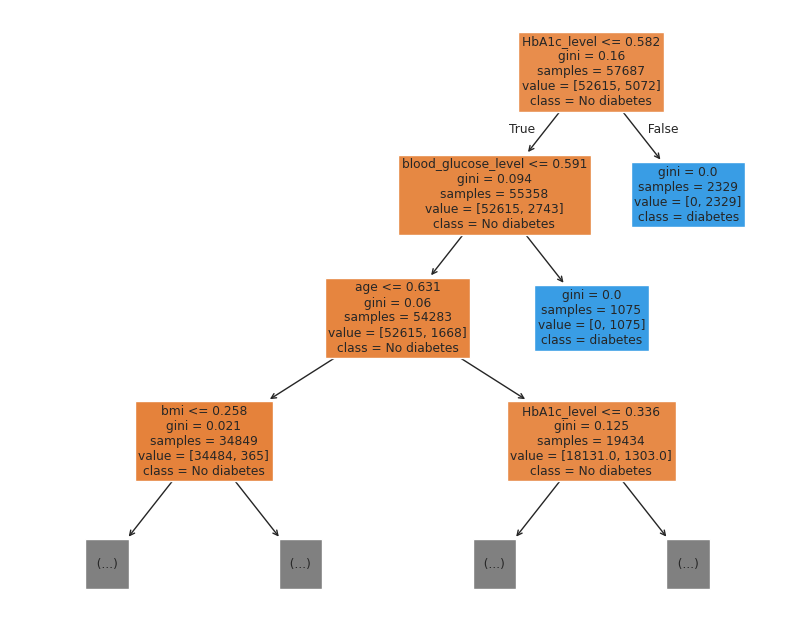

In [ ]:
#  visualizing the decision tree model, truncated after a depth of 3
plt.figure(figsize=(10,8))
classes = ['No diabetes','diabetes']
plot_tree(model, feature_names=X_train.columns, max_depth=3, class_names = classes, filled=True);

we can also display the tree as text

In [ ]:
tree_text = export_text(model, max_depth=3, feature_names=X_train.columns)
print(tree_text)

# try code with print(tree_text)

|--- HbA1c_level <= 0.58
|   |--- blood_glucose_level <= 0.59
|   |   |--- age <= 0.63
|   |   |   |--- bmi <= 0.26
|   |   |   |   |--- truncated branch of depth 25
|   |   |   |--- bmi >  0.26
|   |   |   |   |--- truncated branch of depth 26
|   |   |--- age >  0.63
|   |   |   |--- HbA1c_level <= 0.34
|   |   |   |   |--- class: 0
|   |   |   |--- HbA1c_level >  0.34
|   |   |   |   |--- truncated branch of depth 33
|   |--- blood_glucose_level >  0.59
|   |   |--- class: 1
|--- HbA1c_level >  0.58
|   |--- class: 1



#### Feature Importance

Based on the Gini index computations, a decision tree assigns an 'importamnce' value to each feature. These 'importances' can be used to interprete the results given by a decision tree

In [ ]:
model.feature_importances_

array([0.07274148, 0.0050051 , 0.00524551, 0.11381542, 0.49494944,
       0.2730781 , 0.01296776, 0.        , 0.00728893, 0.01490825])

let's view the importances of the features in a dataframe

In [ ]:

feature_importance_df = pd.DataFrame({'feature': X_train.columns,
                             'importance': model.feature_importances_,
                                    }).sort_values('importance', ascending=False)

feature_importance_df

,feature,importance
4,HbA1c_level,0.494949
5,blood_glucose_level,0.273078
3,bmi,0.113815
0,age,0.072741
9,smoking_history_smoked,0.014908
6,gender_Male,0.012968
8,smoking_history_no Info,0.007289
2,heart_disease,0.005246
1,hypertension,0.005005
7,gender_Other,0.000000


HbA1c Level is the most 'important' feature in predicting whether a person has diabetes or not. It is the feature that is most associated with the target variable

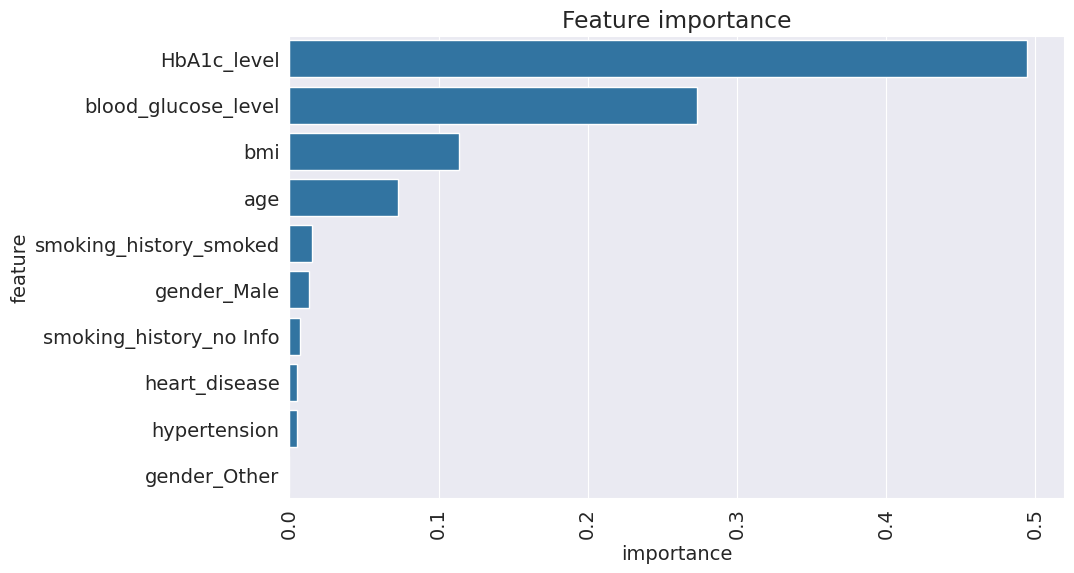

In [ ]:
# feature importance on a bar plot
plt.title('Feature importance')
plt.xticks(rotation=90)
sns.barplot(data=feature_importance_df, x='importance', y='feature');

## 6. Evaluating the model

Earlier, we saw that our data is imbalanced; 91% diabetics and 9% non-diabetic
Due to this, 'accuracy score' may not be a good measure of model performance

The following metrics will be used in assessing the model performance:

1. confusion matrix
2. precision
3. recall
4. F1-score

**Confusion matrix**

A confusion matrix is a useful tool to evaluate the performance of a classification model by mapping its actual and predicted values. In binary classification tasks, it is a table that shows four prediction outcomes: True Positives, True Negatives, False Positives and False Negatives.

The words 'positive' and 'negetive' refer to the target and non target class. In this classification, class "1"(diabetic) is our target class and we refer to patients classified under class "1" as positive. class 0 is the non target class(non diabeteic)

The four prediction outcomes of a binary classifier are explained below

1. True Positives (TP): observations that are predicted as positive, and they are actually positive
2. True Negatives (TN): observations that are predicted as negetive, and they are actually negative
3. False Positives (FP): observations that are wrongly predicted as positive, but they are negative
4. False Negatives (FN): observations that are wrongly predicted as negative, but they are positive


In [ ]:
# Plot confusion matrix for the decision tree predictions
from sklearn.metrics import confusion_matrix

cm_matrix = confusion_matrix(test_target, test_preds)
cm_matrix

array([[16971,   538],
       [  448,  1273]])

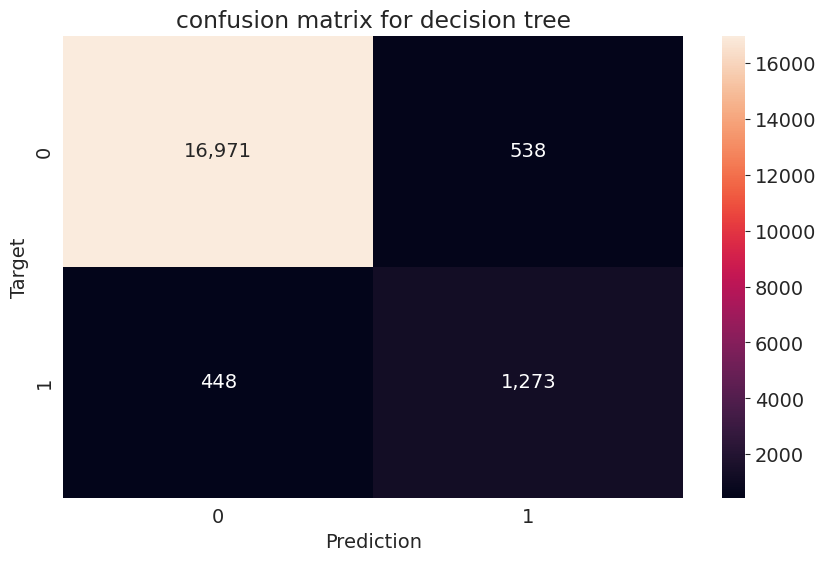

In [ ]:
# view of the confusion matrix on a heatmap
heatmap=sns.heatmap(cm_matrix, fmt=',d', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title("confusion matrix for decision tree")
heatmap;

The confusion matrix summerises the predictions made by the model

* **True positives** = Patients who have diabetes and the model also correctly predicted as having diabetes = **1,273**
* **True negetives** = Patients who do not have diabetes and the model also correctly predicted as not having diabetes = **16,971**
* **False negetives** = Patients who have diabetes but the model wrongly predicted as not having diabetes = **448**
* **False positives** = Patients who do not have but the model predicted as having diabetes = **538**

* The total number of correct predictions by our model = TP+TN = 1,273+16,971=**18,244**
* The total number of incorrect predictions by our model = FN+FP = 448+538=**991**
* The sum of the numbers in all the boxes gives the total number of samples evaluated: **19,230**

**Precision**

Precision shoes how often the model is right when it predicts the target class. It is the number of true positive outcomes divided by the sum of all positive predictions

Precision = TP/(TP +FP)

In [ ]:
precision = 1277/(1277+547) *100

print(f"Precision: {precision:.2f}%")

Precision: 70.01%


**recall(True positive rate)**

Recall is also called 'True Positive rate'. It is the percentage of accurately predicted positives out of all actual positive samples in the dataset

recall = TP/(TP+FN)

In [ ]:
recall = 1277 / (1277+444) * 100

print(f"Recall: {recall:.2f}%")

Recall: 74.20%


**F1-score**

F1-score is described as the harmonic mean of the precision and recall of a classification model.

f1-score = (2\*precision\*recall)/(precision + recall)

In [ ]:
f1_score = (2*precision*recall)/(precision + recall)
print(f"f1_score: {f1_score:.2f}%")

f1_score: 72.05%


#### Choosing the appropriate metric for measurering model performance

Choosing the appropriate metric for measuring model performance may depend on the specific application. In the case of diabetes prediction, recall may be the prefered metric.

Recall answers the question 'If 100 diabetic people visit a health facility, how many, out of the 100 people, can the model correctly predict as being diabetic?. If recall is 0.9, it means the model is able to correctly predict 90%(90 out of 100) of the diabetes patients.

The recall metric is about finding all positive cases, catching as many positive cases as possible, even at the expense of more false positives.
Recall is a good metric when the cost of a false negetive is high. False negetives are those who have diabetes but the model couldnt 'catch' them as having diabetes.


Precision is a good metric when the cost of false positive is high

F1-score is the average of recall and precision

### Checking for overfitting and underfitting

In [ ]:
# confusion_matrix for the training set
train_cm_matrix = confusion_matrix(train_target, train_preds)
train_cm_matrix

array([[52615,     0],
       [   39,  5033]])

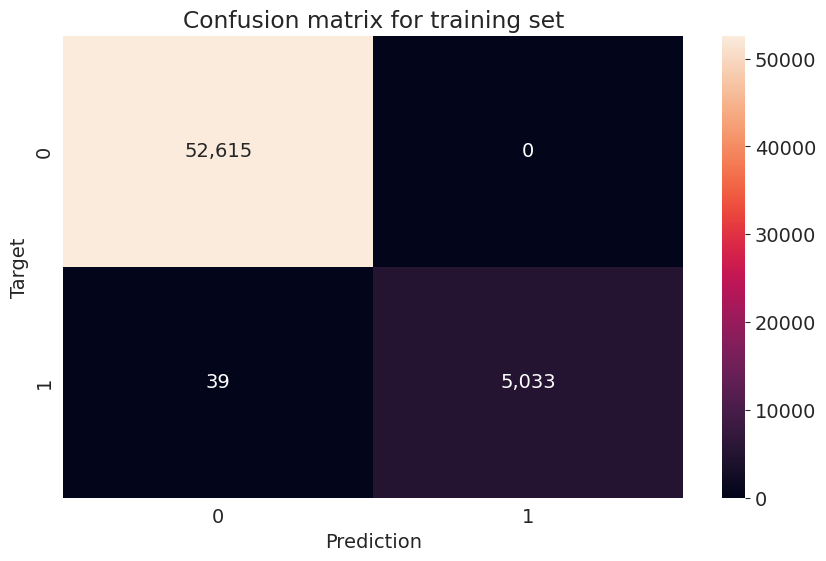

In [ ]:
# heatmap for the confusion matrix
sns.heatmap(train_cm_matrix, fmt=',d', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title("Confusion matrix for training set");

In [ ]:
# training set recall
# we can use the recall_score metric from sklearn to compute for recall

from sklearn.metrics import recall_score

In [ ]:
train_recall = recall_score(train_target, train_preds) * 100
print(f"Training set recall: {train_recall:.2f}%")

Training set recall: 99.23%


In [ ]:
# test set recall from the initial computation
print(f"Test set recall: {recall:.2f}%")

Test set recall: 74.20%


Our training set recall is 99.4% while that of the test set is 74.2%
There is likely an issue of overfitting

**Pruning**

We will use pruning to deal with the issue of overfitting

Pruning involves removing parts of the decision tree that do not contribute significantly to its predictive power. This helps simplify the model and prevent it from memorizing noise in the training data.

We have pre-prunning and post prunning.

Pre- prunning : preprunning stops the growth of the decision tree, preventing it from reaching its full length. it stops the non significant branches from generating in a decision tree

Post prunning : post prunning or 'backward prunning' is a technique that eliminates branches from a completely grown decision tree model to reduce its complexity

In this work, we will be applying pre prunning to reduce overfitting

The parameters we will be tunning include

* max_depth -  specifies the maximum depth of the tree
* min_samples_leaf - specifies the minimum number of samples required at a leaf node
* min_samples_split - specifies the minimum number of samples required to split an internal node

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = { 'max_depth': [2,4,6,8,10,12],
             'min_samples_split': [2,3,4],
             'min_samples_leaf': [1,2,3]}

dec_tree_model = DecisionTreeClassifier(random_state=42, class_weight={0:1, 1:9})
gcv =  GridSearchCV(estimator=dec_tree_model, param_grid=parameter, scoring='recall', cv=5)
gcv.fit(X_train, train_target)

# GridSearchCV takes the decision tree and tries different
# combinations of parameters, and comes up with the best parameters for the
# decision tree based on recall scoring
# However, because we are prunning the tree,
# we have restricted some of the parameters to only certain 'values'


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 9},
                                              random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]},
             scoring='recall')

The best parameters found by GridSearchCV are stored in
the best_params_ attrubute and the best decision tree produced by these best parameters are stored in the best_estimator_ attrubute

In [ ]:
# best parameters
gcv.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
# best model
gcv.best_estimator_

DecisionTreeClassifier(class_weight={0: 1, 1: 9}, max_depth=6, random_state=42)

In [ ]:
# we store the best model in 'prunned_model'
prunned_model = gcv.best_estimator_

# here, we use the best decision tree for training our data
prunned_model.fit(X_train, train_target)

# making predictions
X_train_preds= prunned_model.predict(X_train)
X_val_preds = prunned_model.predict(X_val)
X_test_preds = prunned_model.predict(X_test)

In [ ]:
cm_prunned_train = confusion_matrix(train_target, X_train_preds)
cm_prunned_val = confusion_matrix(val_target, X_val_preds)
cm_prunned_test = confusion_matrix(test_target, X_test_preds)

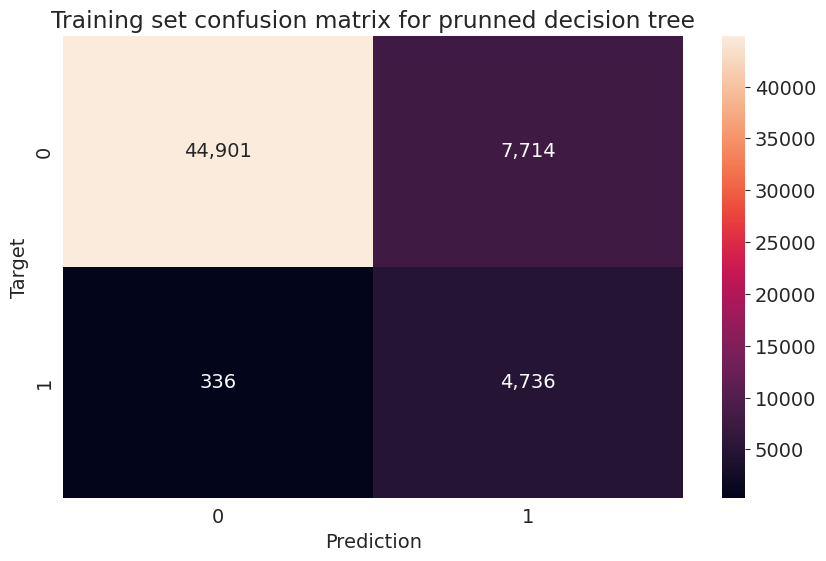

In [ ]:
# heatmap for the confusion matrix
sns.heatmap(cm_prunned_train, fmt=',d', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title("Training set confusion matrix for prunned decision tree");

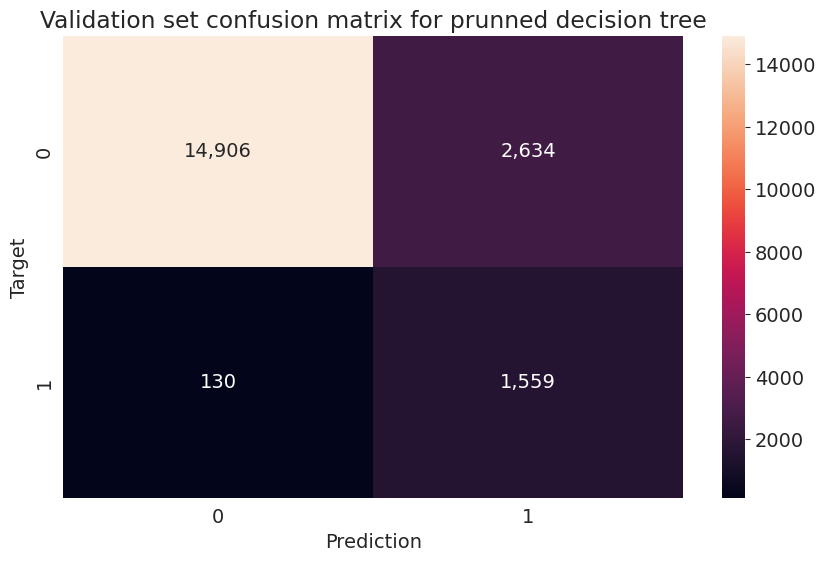

In [ ]:
# heatmap for the confusion matrix
sns.heatmap(cm_prunned_val, fmt=',d', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title("Validation set confusion matrix for prunned decision tree");

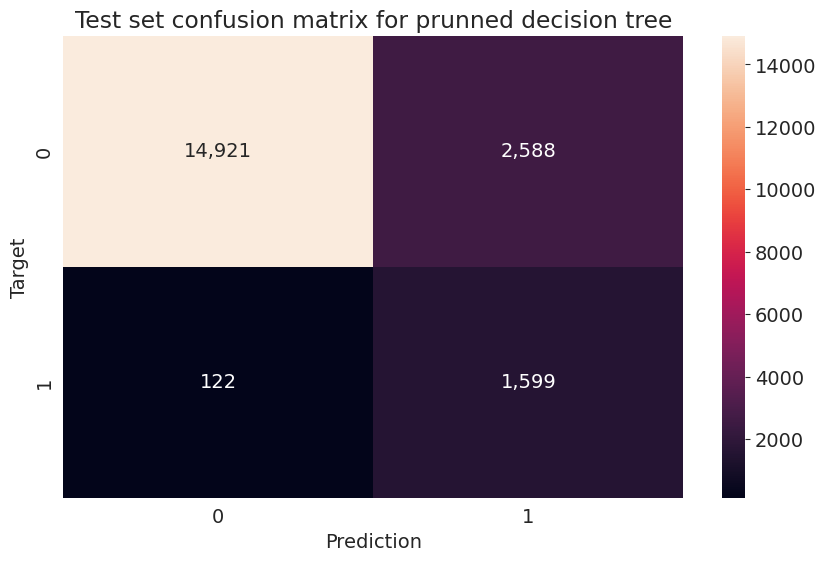

In [ ]:
# heatmap for the confusion matrix
sns.heatmap(cm_prunned_test, fmt=',d', annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title("Test set confusion matrix for prunned decision tree");

In [ ]:
train_recall = recall_score(train_target, X_train_preds) * 100
val_recall = recall_score(val_target, X_val_preds) * 100
test_recall = recall_score(test_target, X_test_preds) * 100

print(f"Train set recall: {train_recall:>10.2f}%\n")
print(f"Validation set recall: {val_recall:.2f}%\n")
print(f"Test set recall: {test_recall:>11.2f}%")

Train set recall:      93.38%

Validation set recall: 92.30%

Test set recall:       92.91%


The training set recall has reduced from 99.23% to 93.8%, while the test set recall has increased from 74.2% to 92.9%

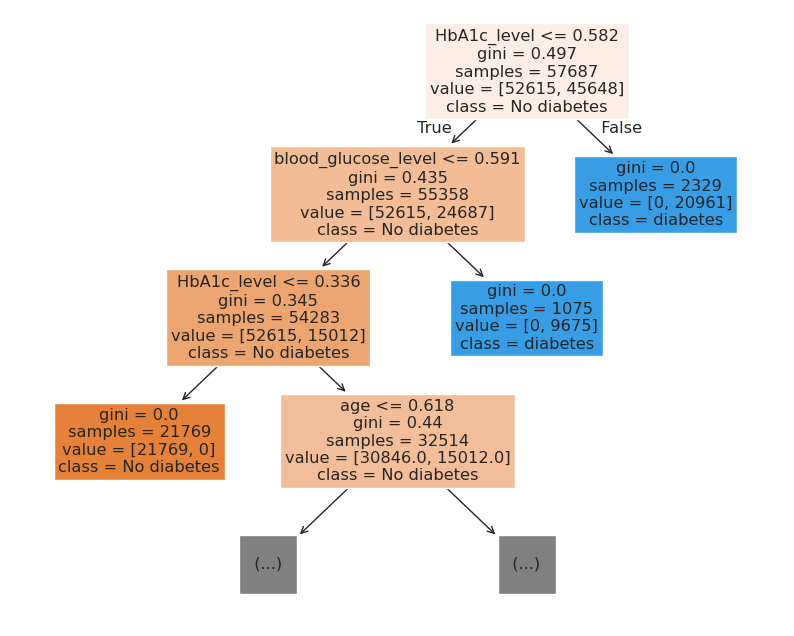

In [ ]:
# Plotting the prunned decision tree
plt.figure(figsize=(10, 8))
classes = ['No diabetes','diabetes']
plot_tree(prunned_model, feature_names=X_train.columns, max_depth=3, class_names =classes, filled=True)
plt.show();

In [ ]:
# let's view the feature importance of the prunned decision tree model
importance_df = pd.DataFrame({'feature': X_train.columns,
                             'importance': prunned_model.feature_importances_}).sort_values('importance', ascending=False)
importance_df

,feature,importance
4,HbA1c_level,0.517829
5,blood_glucose_level,0.355762
0,age,0.100101
3,bmi,0.026308
1,hypertension,0.000000
2,heart_disease,0.000000
6,gender_Male,0.000000
7,gender_Other,0.000000
8,smoking_history_no Info,0.000000
9,smoking_history_smoked,0.000000


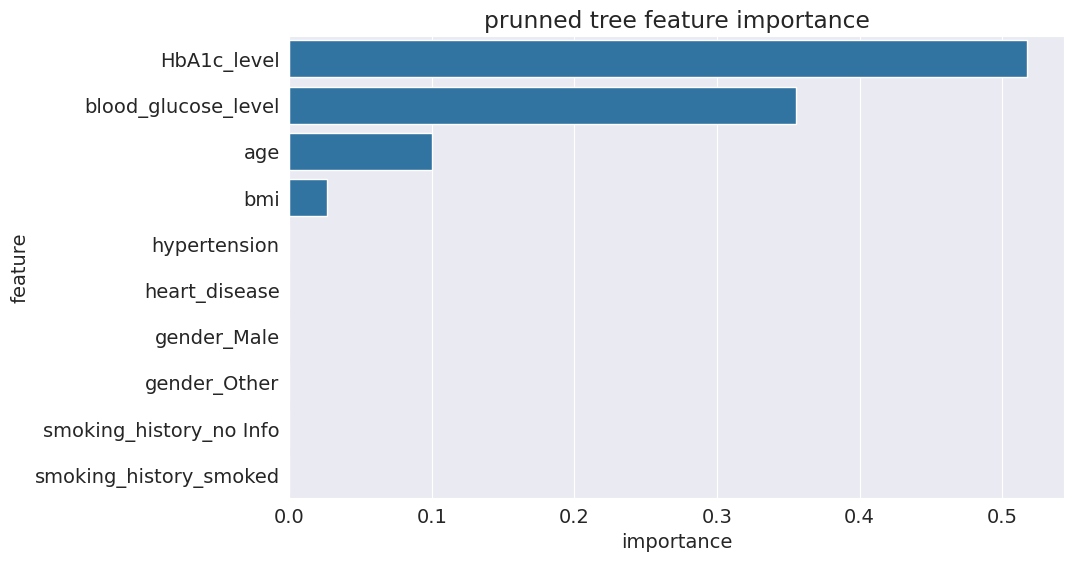

In [ ]:
plt.title('prunned tree feature importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## 7. Conclusion and Future Work

In this project, we explored and implemented a decision tree model to predict diabetes based on a range of health metrics from the Pima Indians Diabetes Dataset. Through data preprocessing and exploratory data analysis, we gained insights into the dataset, which guided us in building a model that achieved a recall score of **93%**.

The feature importance analysis indicated that certain factors, such as **Glucose** and **BMI**, had a more significant impact on predicting diabetes, aligning with known health risk indicators. This interpretability is a key advantage of decision trees, allowing us to understand which features are most influential in the model’s predictions.

### Future Work

While this model provides a good baseline, there are several ways to improve upon this work:
- **Model Improvement**: Implementing more complex models, such as Random Forest or Gradient Boosting, could potentially improve accuracy and generalization.
- **Data Collection and Augmentation**: Gathering additional data or balancing classes with data augmentation techniques may help to enhance model robustness and fairness.
- **Further Analysis**: Exploring interactions between features and performing deeper statistical analyses could uncover additional insights into diabetes risk factors.

This project demonstrates the value of decision tree models in healthcare-related predictions, and with further refinement, such models could serve as helpful tools in early detection and preventive healthcare.


## 8. References

1. Youtube course: Machine Learning with Python and Scikit-Learn by Aakash N S: https://www.youtube.com/watch?v=hDKCxebp88A

2. https://encord.com/blog/f1-score-in-machine-learning/?utm_content=ai_after_hours

3. https://machinelearningmastery.com/cost-sensitive-decision-trees-for-imbalanced-classificationm

4. https://www.geeksforgeeks.org/overfitting-in-decision-tree-models

import 'package:flutter/material.dart';

import '../widget_box/calculateButton.dart';
import '../widget_box/customDropdrown.dart';
import '../widget_box/customTextField.dart';

class PredictDiabetesPage extends StatefulWidget {
  @override
  _PredictDiabetesPageState createState() => _PredictDiabetesPageState();
}

class _PredictDiabetesPageState extends State<PredictDiabetesPage> {
  final TextEditingController ageController = TextEditingController();
  final TextEditingController bmiController = TextEditingController();
  final TextEditingController hba1cController = TextEditingController();
  final TextEditingController glucoseController = TextEditingController();

  String? selectedGender;
  String? hasHypertension;
  String? doesSmoke;

  @override
  Widget build(BuildContext context) {
    return Scaffold(
      appBar: AppBar(
        title: const Text('Predict Diabetes Risk'),
      ),
      body: Padding(
        padding: const EdgeInsets.all(16.0),
        child: Column(
          crossAxisAlignment: CrossAxisAlignment.start,
          children: [
            CustomDropdown(
              value: selectedGender,
              hint: 'Select Gender',
              items: ['Male', 'Female'],
              onChanged: (value) {
                setState(() {
                  selectedGender = value;
                });
              },
            ),
            const SizedBox(height: 16),
            CustomTextField(
              label: 'Enter Age',
              controller: ageController,
            ),
            const SizedBox(height: 16),
            CustomDropdown(
              value: hasHypertension,
              hint: 'Do you have hypertension?',
              items: ['Yes', 'No'],
              onChanged: (value) {
                setState(() {
                  hasHypertension = value;
                });
              },
            ),
            const SizedBox(height: 16),
            CustomDropdown(
              value: doesSmoke,
              hint: 'Do you smoke?',
              items: ['Yes', 'No'],
              onChanged: (value) {
                setState(() {
                  doesSmoke = value;
                });
              },
            ),
            const SizedBox(height: 16),
            CustomTextField(
              label: 'Enter BMI',
              controller: bmiController,
            ),
            const SizedBox(height: 16),
            CustomTextField(
              label: 'Enter HbA1c (%)',
              controller: hba1cController,
            ),
            const SizedBox(height: 16),
            CustomTextField(
              label: 'Enter Glucose (mg/dL)',
              controller: glucoseController,
            ),
            CustomElevatedButton(
              onPressed: () {
                // Handle the submit action here
                // e.g., validate inputs or navigate to results page
                print("Submit button pressed");
              },
              text: "Submit",
            ),
          ],
        ),
      ),
    );
  }
}

